In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
%cd /content/gdrive/My Drive/DATASETS/ARRYTHMIA

/content/gdrive/My Drive/DATASETS/ARRYTHMIA


In [3]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
#from autoencoder import Autoencoder
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data.dataset import Dataset as dataset
from torch.autograd import Variable

In [4]:
train_df = pd.read_csv('TRAIN_DATA_NORM_VEB_16K.csv')

In [5]:
train_df.head()

,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_morph0,0_qrs_morph1,0_qrs_morph3,0_qrs_morph4,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,Label
0,0.438303,0.266989,0.576403,0.408554,0.542624,0.542624,0.488489,0.675400,0.539111,0.292618,0.263815,0.490166,0.644686,0.577750,0.577750,0.557462,0.620977,0.519430,0.607794,0
1,0.491285,0.258393,0.535019,0.388107,0.550598,0.550598,0.474882,0.626789,0.615517,0.287513,0.285442,0.478941,0.642074,0.568453,0.568453,0.547180,0.610081,0.510764,0.601864,0
2,0.440104,0.391836,0.559018,0.317185,0.545932,0.545932,0.530691,0.635959,0.477287,0.304028,0.325511,0.388111,0.545082,0.493227,0.493227,0.458583,0.496309,0.399050,0.478359,0
3,0.486867,0.464057,0.670241,0.285911,0.573835,0.573835,0.601868,0.653305,0.354840,0.302150,0.286775,0.453499,0.592144,0.547382,0.547382,0.510903,0.559054,0.457303,0.539486,1
4,0.474577,0.342478,0.424945,0.412417,0.565465,0.565465,0.493817,0.532375,0.540755,0.300088,0.313881,0.518940,0.675353,0.568931,0.568931,0.551942,0.618632,0.523256,0.630159,1


In [6]:
train_df['Label'].unique()

array([0, 1])

In [7]:
train_df['Label'][train_df['Label']>1.0] = 1.0

<ipython-input-7-2336b14ac71e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Label'][train_df['Label']>1.0] = 1.0


In [8]:
train_df.shape

(16000, 20)

In [9]:
train_df['Label'].unique()

array([0, 1])

In [10]:
df0 = train_df.iloc[0:4000]
#df3.loc[ df3['Label'] == 2.0, 'Label'] = 1.0
df0

,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_morph0,0_qrs_morph1,0_qrs_morph3,0_qrs_morph4,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,Label
0,0.438303,0.266989,0.576403,0.408554,0.542624,0.542624,0.488489,0.675400,0.539111,0.292618,0.263815,0.490166,0.644686,0.577750,0.577750,0.557462,0.620977,0.519430,0.607794,0
1,0.491285,0.258393,0.535019,0.388107,0.550598,0.550598,0.474882,0.626789,0.615517,0.287513,0.285442,0.478941,0.642074,0.568453,0.568453,0.547180,0.610081,0.510764,0.601864,0
2,0.440104,0.391836,0.559018,0.317185,0.545932,0.545932,0.530691,0.635959,0.477287,0.304028,0.325511,0.388111,0.545082,0.493227,0.493227,0.458583,0.496309,0.399050,0.478359,0
3,0.486867,0.464057,0.670241,0.285911,0.573835,0.573835,0.601868,0.653305,0.354840,0.302150,0.286775,0.453499,0.592144,0.547382,0.547382,0.510903,0.559054,0.457303,0.539486,1
4,0.474577,0.342478,0.424945,0.412417,0.565465,0.565465,0.493817,0.532375,0.540755,0.300088,0.313881,0.518940,0.675353,0.568931,0.568931,0.551942,0.618632,0.523256,0.630159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.471422,0.284782,0.477482,0.411876,0.553217,0.553217,0.477100,0.577394,0.581070,0.303281,0.282392,0.483205,0.645623,0.570174,0.570174,0.549207,0.612575,0.513024,0.604997,0
3996,0.461224,0.497188,0.533180,0.609526,0.570435,0.570435,0.499744,0.570957,0.691194,0.280828,0.329659,0.409817,0.578276,0.511204,0.511204,0.479755,0.529763,0.435593,0.520645,1
3997,0.496278,0.393054,0.448834,0.353799,0.504316,0.504316,0.423059,0.481948,0.625622,0.290551,0.330377,0.502657,0.528398,0.575664,0.575664,0.556837,0.633060,0.528170,0.532425,1
3998,0.453347,0.414441,0.452463,0.542009,0.533790,0.533790,0.450149,0.464623,0.543422,0.291453,0.283516,0.491708,0.639434,0.576995,0.576995,0.557933,0.624273,0.518735,0.602449,0


In [11]:
df1 = train_df.iloc[4000:8000]
#df3.loc[ df3['Label'] == 2.0, 'Label'] = 1.0
df1

,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_morph0,0_qrs_morph1,0_qrs_morph3,0_qrs_morph4,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,Label
4000,0.448411,0.322971,0.434544,0.397068,0.536153,0.536153,0.454652,0.500002,0.597734,0.289395,0.285135,0.491049,0.634333,0.575427,0.575427,0.556932,0.623541,0.517434,0.600849,0
4001,0.500057,0.353796,0.311492,0.336963,0.501937,0.501937,0.383780,0.352803,0.378772,0.286382,0.302396,0.422881,0.595434,0.521869,0.521869,0.492316,0.547557,0.454118,0.541877,1
4002,0.452067,0.308434,0.447766,0.395428,0.533638,0.533638,0.454421,0.493575,0.610962,0.289399,0.293712,0.487347,0.635888,0.575416,0.575416,0.554594,0.614768,0.509994,0.596078,0
4003,0.452811,0.296686,0.415013,0.407628,0.562164,0.562164,0.486562,0.526532,0.534420,0.289370,0.376967,0.513188,0.495777,0.575564,0.575564,0.559003,0.642255,0.531997,0.511119,1
4004,0.435052,0.246036,0.664860,0.341554,0.538016,0.538016,0.526980,0.743457,0.540774,0.290463,0.286907,0.475718,0.639394,0.565785,0.565785,0.544037,0.606499,0.507519,0.598428,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.429500,0.252940,0.651155,0.328442,0.538782,0.538782,0.484654,0.767613,0.543024,0.300302,0.276464,0.469411,0.634146,0.559004,0.559004,0.536051,0.597398,0.499659,0.590103,0
7996,0.430195,0.306118,0.457913,0.366984,0.539088,0.539088,0.463412,0.564496,0.555254,0.290670,0.284260,0.486639,0.638167,0.574829,0.574829,0.551990,0.612412,0.510234,0.598662,0
7997,0.440882,0.398306,0.569082,0.301764,0.545578,0.545578,0.539325,0.623748,0.437763,0.303154,0.327967,0.391224,0.543217,0.495805,0.495805,0.461619,0.498886,0.400184,0.477907,0
7998,0.441843,0.390747,0.543400,0.322194,0.551166,0.551166,0.534658,0.598551,0.444352,0.301282,0.318864,0.405241,0.554676,0.507414,0.507414,0.475292,0.515051,0.414932,0.493222,0


In [12]:
df2 = train_df.iloc[8000:12000]
#df3.loc[ df3['Label'] == 2.0, 'Label'] = 1.0
#df2

In [13]:
df3 = train_df.iloc[12000:16000]
#df3.loc[ df3['Label'] == 2.0, 'Label'] = 1.0
#df3

In [14]:
# df4 = train_df.iloc[20000:25000]
# #df4.loc[ df4['Label'] == 2.0, 'Label'] = 1.0
# df4

In [15]:
df_final = pd.concat([df0,df1, df2,df3])#df6,df7,df8,df9,df10])
df_final

,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_morph0,0_qrs_morph1,0_qrs_morph3,0_qrs_morph4,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,Label
0,0.438303,0.266989,0.576403,0.408554,0.542624,0.542624,0.488489,0.675400,0.539111,0.292618,0.263815,0.490166,0.644686,0.577750,0.577750,0.557462,0.620977,0.519430,0.607794,0
1,0.491285,0.258393,0.535019,0.388107,0.550598,0.550598,0.474882,0.626789,0.615517,0.287513,0.285442,0.478941,0.642074,0.568453,0.568453,0.547180,0.610081,0.510764,0.601864,0
2,0.440104,0.391836,0.559018,0.317185,0.545932,0.545932,0.530691,0.635959,0.477287,0.304028,0.325511,0.388111,0.545082,0.493227,0.493227,0.458583,0.496309,0.399050,0.478359,0
3,0.486867,0.464057,0.670241,0.285911,0.573835,0.573835,0.601868,0.653305,0.354840,0.302150,0.286775,0.453499,0.592144,0.547382,0.547382,0.510903,0.559054,0.457303,0.539486,1
4,0.474577,0.342478,0.424945,0.412417,0.565465,0.565465,0.493817,0.532375,0.540755,0.300088,0.313881,0.518940,0.675353,0.568931,0.568931,0.551942,0.618632,0.523256,0.630159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.483303,0.550291,0.581599,0.650026,0.556374,0.556374,0.478610,0.498228,0.660334,0.290086,0.257262,0.485063,0.643471,0.573523,0.573523,0.552084,0.614336,0.513517,0.603958,0
15996,0.465322,0.283926,0.458206,0.373100,0.530459,0.530459,0.455019,0.515680,0.625787,0.291595,0.333436,0.372481,0.553502,0.480282,0.480282,0.443337,0.491740,0.403548,0.488325,0
15997,0.430584,0.404814,0.443528,0.534536,0.536754,0.536754,0.457558,0.486689,0.578516,0.291787,0.280896,0.486842,0.634691,0.574997,0.574997,0.554233,0.615330,0.510939,0.596468,0
15998,0.436530,0.308155,0.457760,0.366139,0.545633,0.545633,0.471669,0.562781,0.583974,0.291027,0.323015,0.391966,0.569713,0.490389,0.490389,0.455241,0.505306,0.417855,0.503476,0


In [16]:
df_final['Label'].value_counts()

,count
Label,
0,10000
1,6000


In [17]:
#First get the labels and then drop it. Dont run it first.

df0_arr = df0.drop(columns=['Label'])
df1_arr = df1.drop(columns=['Label'])
df2_arr = df2.drop(columns=['Label'])
df3_arr = df3.drop(columns=['Label'])
#df4_arr = df4.drop(columns=['Label'])
#df5_arr = df5.drop(columns=['Label'])
# df6_arr = df6.drop(columns=['Label'])
# df7_arr = df7.drop(columns=['Label'])
# df8_arr = df8.drop(columns=['Label'])
# df9_arr = df9.drop(columns=['Label'])
# df10_arr = df10.drop(columns=['Label'])

In [18]:
df0_arr = df0_arr.to_numpy()
df1_arr = df1_arr.to_numpy()
df2_arr = df2_arr.to_numpy()
df3_arr = df3_arr.to_numpy()
#df4_arr = df4_arr.to_numpy()
#df5_arr = df5_arr.to_numpy()
# df6_arr = df6_arr.to_numpy()
# df7_arr = df7_arr.to_numpy()
# df8_arr = df8_arr.to_numpy()
# df9_arr = df9_arr.to_numpy()
# df10_arr = df10_arr.to_numpy()

In [19]:
df0_arr = df0_arr.reshape(1,df0_arr.shape[0],df0_arr.shape[1])
df0_arr.shape

(1, 4000, 19)

In [20]:
df1_arr = df1_arr.reshape(1,df1_arr.shape[0],df1_arr.shape[1])
df1_arr.shape

(1, 4000, 19)

In [21]:
df2_arr = df2_arr.reshape(1,df2_arr.shape[0],df2_arr.shape[1])
df2_arr.shape

(1, 4000, 19)

In [22]:
df3_arr = df3_arr.reshape(1,df3_arr.shape[0],df3_arr.shape[1])
df3_arr.shape

(1, 4000, 19)

In [23]:
# df4_arr = df4_arr.reshape(1,df4_arr.shape[0],df4_arr.shape[1])
# df4_arr.shape

In [24]:
data_final_train = np.vstack((df0_arr,df1_arr,df2_arr,df3_arr))#df6_arr,df7_arr,df8_arr,df9_arr,df10_arr))
data_final_train.shape

(4, 4000, 19)

In [25]:
labels = pd.concat([df0['Label'],df1['Label'],df2['Label'],df3['Label']])
labels

,Label
0,0
1,0
2,0
3,1
4,1
...,...
15995,0
15996,0
15997,0
15998,0


In [26]:
labels = labels.to_numpy()

In [27]:
#BOT_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/BOT.csv')

VEB_test = pd.read_csv('TRAIN_DATA_NORM_VEB_16K.csv')
VEB_test

,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_morph0,0_qrs_morph1,0_qrs_morph3,0_qrs_morph4,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,Label
0,0.438303,0.266989,0.576403,0.408554,0.542624,0.542624,0.488489,0.675400,0.539111,0.292618,0.263815,0.490166,0.644686,0.577750,0.577750,0.557462,0.620977,0.519430,0.607794,0
1,0.491285,0.258393,0.535019,0.388107,0.550598,0.550598,0.474882,0.626789,0.615517,0.287513,0.285442,0.478941,0.642074,0.568453,0.568453,0.547180,0.610081,0.510764,0.601864,0
2,0.440104,0.391836,0.559018,0.317185,0.545932,0.545932,0.530691,0.635959,0.477287,0.304028,0.325511,0.388111,0.545082,0.493227,0.493227,0.458583,0.496309,0.399050,0.478359,0
3,0.486867,0.464057,0.670241,0.285911,0.573835,0.573835,0.601868,0.653305,0.354840,0.302150,0.286775,0.453499,0.592144,0.547382,0.547382,0.510903,0.559054,0.457303,0.539486,1
4,0.474577,0.342478,0.424945,0.412417,0.565465,0.565465,0.493817,0.532375,0.540755,0.300088,0.313881,0.518940,0.675353,0.568931,0.568931,0.551942,0.618632,0.523256,0.630159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.483303,0.550291,0.581599,0.650026,0.556374,0.556374,0.478610,0.498228,0.660334,0.290086,0.257262,0.485063,0.643471,0.573523,0.573523,0.552084,0.614336,0.513517,0.603958,0
15996,0.465322,0.283926,0.458206,0.373100,0.530459,0.530459,0.455019,0.515680,0.625787,0.291595,0.333436,0.372481,0.553502,0.480282,0.480282,0.443337,0.491740,0.403548,0.488325,0
15997,0.430584,0.404814,0.443528,0.534536,0.536754,0.536754,0.457558,0.486689,0.578516,0.291787,0.280896,0.486842,0.634691,0.574997,0.574997,0.554233,0.615330,0.510939,0.596468,0
15998,0.436530,0.308155,0.457760,0.366139,0.545633,0.545633,0.471669,0.562781,0.583974,0.291027,0.323015,0.391966,0.569713,0.490389,0.490389,0.455241,0.505306,0.417855,0.503476,0


In [28]:
#BOT_test.isna().sum()

In [29]:
#X_BOT_test = BOT_test.drop(labels = ['Label'], axis=1)
VEB_test_x = VEB_test.drop(labels = ['Label'], axis=1)

In [30]:
#X_BOT_test = X_BOT_test.to_numpy()
X_VEB_test = VEB_test_x.to_numpy()

In [31]:
#y_BOT_test = BOT_test['Label']
y_VEB_test = VEB_test['Label']

In [32]:
#y_BOT_test.value_counts()

y_VEB_test.value_counts()

,count
Label,
0,10000
1,6000


In [33]:
#y_BOT_test[y_BOT_test>1.0] = 1.0

y_VEB_test[y_VEB_test>1.0] = 1.0

<ipython-input-33-96dcf12c1c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_VEB_test[y_VEB_test>1.0] = 1.0


In [34]:
#y_BOT_test = y_BOT_test.to_numpy()

y_VEB_test = y_VEB_test.to_numpy()

In [35]:
#RARE_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/RARE.csv')

F_test = pd.read_csv('ARRYTH_F.csv')

In [36]:
#RARE_test.isna().sum()
F_test.isna().sum()

,0
0_pPeak,0
0_tPeak,0
0_rPeak,0
0_sPeak,0
0_qPeak,0
0_qrs_morph0,0
0_qrs_morph1,0
0_qrs_morph3,0
0_qrs_morph4,0
1_pPeak,0


In [37]:
#X_RARE_test = RARE_test.drop(labels = ['Label'], axis=1)
X_F_test = F_test.drop(labels = ['Label'], axis=1)

In [38]:
#X_RARE_test = X_RARE_test.to_numpy()

X_F_test = X_F_test.to_numpy()

In [39]:
#y_RARE_test = RARE_test['Label']

y_F_test = F_test['Label']

In [40]:
#y_RARE_test.value_counts()
y_F_test.value_counts()

,count
Label,
1,803


In [41]:
#y_RARE_test[y_RARE_test>1.0] = 1.0

y_F_test[y_F_test>1.0] = 1.0

<ipython-input-41-89c53389011e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_F_test[y_F_test>1.0] = 1.0


In [42]:
#y_RARE_test = y_RARE_test.to_numpy()

y_F_test = y_F_test.to_numpy()

In [43]:
#SlowHTTPTest_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/SlowHTTPTest.csv')

SVEB_test = pd.read_csv('ARRYTH_SVEB_TEST.csv')

In [44]:
#SlowHTTPTest_test.isna().sum()

SVEB_test.isna().sum()

,0
0_pPeak,0
0_tPeak,0
0_rPeak,0
0_sPeak,0
0_qPeak,0
0_qrs_morph0,0
0_qrs_morph1,0
0_qrs_morph3,0
0_qrs_morph4,0
1_pPeak,0


In [45]:
#X_SlowHTTPTest_test = SlowHTTPTest_test.drop(labels = ['Label'], axis=1)

X_SVEB_test = SVEB_test.drop(labels = ['Label'], axis=1)

In [46]:
#X_SlowHTTPTest_test = X_SlowHTTPTest_test.to_numpy()

X_SVEB_test = X_SVEB_test.to_numpy()

In [47]:
#y_SlowHTTPTest_test = SlowHTTPTest_test['Label']

y_SVEB_test = SVEB_test['Label']

In [48]:
#y_SlowHTTPTest_test.value_counts()

y_SVEB_test.value_counts()

,count
Label,
1,1000


In [49]:
#y_SlowHTTPTest_test[y_SlowHTTPTest_test>1.0] = 1.0

y_SVEB_test[y_SVEB_test>1.0] = 1.0

<ipython-input-49-621b3290515b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_SVEB_test[y_SVEB_test>1.0] = 1.0


In [50]:
#y_SlowHTTPTest_test = y_SlowHTTPTest_test.to_numpy()

y_SVEB_test = y_SVEB_test.to_numpy()

In [51]:
#OOD_INFIL_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/OOD_INFIL.csv')

VEB_test = pd.read_csv('ARRYTH_VEB.csv')

In [52]:
#OOD_INFIL_test.isna().sum()

VEB_test.isna().sum()

,0
0_pPeak,0
0_tPeak,0
0_rPeak,0
0_sPeak,0
0_qPeak,0
0_qrs_morph0,0
0_qrs_morph1,0
0_qrs_morph3,0
0_qrs_morph4,0
1_pPeak,0


In [53]:
#X_OOD_INFIL_test = OOD_INFIL_test.drop(labels = ['Label'], axis=1)

X_VEB_test = VEB_test.drop(labels = ['Label'], axis=1)

In [54]:
#X_OOD_INFIL_test = X_OOD_INFIL_test.to_numpy()

X_VEB_test = X_VEB_test.to_numpy()



In [55]:
#y_OOD_INFIL_test = OOD_INFIL_test['Label']

y_VEB_test = VEB_test['Label']

In [56]:
#y_OOD_INFIL_test.value_counts()

y_VEB_test.value_counts()

,count
Label,
1,7009


In [57]:
#y_OOD_INFIL_test[y_OOD_INFIL_test>1.0] = 1.0

y_VEB_test[y_VEB_test>1.0] = 1.0

<ipython-input-57-50b917ff398d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_VEB_test[y_VEB_test>1.0] = 1.0


In [58]:
#y_OOD_INFIL_test = y_OOD_INFIL_test.to_numpy()

y_VEB_test = y_VEB_test.to_numpy()

In [59]:
#DDOS_SOLARIS_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/DDOS_SOLARIS.csv')

Q_test = pd.read_csv('ARRYTH_Q.csv')

In [60]:
#DDOS_SOLARIS_test.isna().sum()

Q_test.isna().sum()

,0
0_pPeak,0
0_tPeak,0
0_rPeak,0
0_sPeak,0
0_qPeak,0
0_qrs_morph0,0
0_qrs_morph1,0
0_qrs_morph3,0
0_qrs_morph4,0
1_pPeak,0


In [61]:
#X_DDOS_SOLARIS_test = DDOS_SOLARIS_test.drop(labels = ['Label'], axis=1)

X_Q_test = Q_test.drop(labels = ['Label'], axis=1)

In [62]:
#X_DDOS_SOLARIS_test = X_DDOS_SOLARIS_test.to_numpy()

X_Q_test = X_Q_test.to_numpy()

In [63]:
#y_DDOS_SOLARIS_test = DDOS_SOLARIS_test['Label']

y_Q_test = Q_test['Label']

In [64]:
#y_DDOS_SOLARIS_test.value_counts()

y_Q_test.value_counts()

,count
Label,
1,15


In [65]:
#y_DDOS_SOLARIS_test[y_DDOS_SOLARIS_test>1.0] = 1.0

y_Q_test[y_Q_test>1.0] = 1.0

<ipython-input-65-6c1bbd67df04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_Q_test[y_Q_test>1.0] = 1.0


In [66]:
#y_DDOS_SOLARIS_test = y_DDOS_SOLARIS_test.to_numpy()

y_Q_test = y_Q_test.to_numpy()

In [67]:
#DDOS_HOIC_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/DDOS_HOIC.csv')

In [68]:
#DDOS_HOIC_test.isna().sum()

In [69]:
#X_DDOS_HOIC_test = DDOS_HOIC_test.drop(labels = ['Label'], axis=1)

In [70]:
#X_DDOS_HOIC_test = X_DDOS_HOIC_test.to_numpy()

In [71]:
#y_DDOS_HOIC_test = DDOS_HOIC_test['Label']

In [72]:
#y_DDOS_HOIC_test.value_counts()

In [73]:
#y_DDOS_HOIC_test[y_DDOS_HOIC_test>1.0] = 1.0

In [74]:
#y_DDOS_HOIC_test = y_DDOS_HOIC_test.to_numpy()

In [75]:
#DDOS_GOLDEN_EYE_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/DDOS_GOLDEN_EYE.csv')

In [76]:
#DDOS_GOLDEN_EYE_test.isna().sum()

In [77]:
#X_DDOS_GOLDEN_EYE_test = DDOS_GOLDEN_EYE_test.drop(labels = ['Label'], axis=1)

In [78]:
#X_DDOS_GOLDEN_EYE_test = X_DDOS_GOLDEN_EYE_test.to_numpy()

In [79]:
#y_DDOS_GOLDEN_EYE_test = DDOS_GOLDEN_EYE_test['Label']

In [80]:
#y_DDOS_GOLDEN_EYE_test.value_counts()

In [81]:
#y_DDOS_GOLDEN_EYE_test[y_DDOS_GOLDEN_EYE_test>1.0] = 1.0

In [82]:
#y_DDOS_GOLDEN_EYE_test = y_DDOS_GOLDEN_EYE_test.to_numpy()

In [83]:
#BENIGN_TEST_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/BENIGN_TEST.csv')

BENIGN_TEST_test = pd.read_csv('ARRYTH_NORM_TEST.csv') #BENIGN_TEST.csv')
BENIGN_TEST_test

,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_morph0,0_qrs_morph1,0_qrs_morph3,0_qrs_morph4,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,Label
0,0.443052,0.295496,0.613567,0.368829,0.545137,0.545137,0.495019,0.725160,0.601062,0.300290,0.269418,0.580159,0.587926,0.580332,0.580332,0.562380,0.628353,0.549820,0.697921,0
1,0.444765,0.584627,0.611435,0.674982,0.545853,0.545853,0.471386,0.558154,0.705977,0.305670,0.347795,0.587302,0.732228,0.585745,0.585745,0.568408,0.635614,0.537340,0.648027,0
2,0.447429,0.568965,0.601506,0.666677,0.548741,0.548741,0.478150,0.567283,0.711144,0.296664,0.332686,0.571533,0.719109,0.580952,0.580952,0.562668,0.635022,0.545000,0.670679,0
3,0.445831,0.295385,0.591995,0.374701,0.548165,0.548165,0.498104,0.705593,0.556872,0.298806,0.266127,0.569975,0.591316,0.582799,0.582799,0.566780,0.664067,0.602445,0.632089,0
4,0.444439,0.299496,0.609698,0.374006,0.547352,0.547352,0.503817,0.726136,0.612336,0.299477,0.337599,0.578348,0.724779,0.580184,0.580184,0.561636,0.627403,0.527490,0.638360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.434000,0.589010,0.612437,0.675821,0.543406,0.543406,0.465107,0.486840,0.633324,0.288649,0.255933,0.582924,0.555552,0.574983,0.574983,0.560987,0.675427,0.615486,0.626019,0
9996,0.432074,0.587216,0.619711,0.681905,0.541208,0.541208,0.465453,0.483403,0.588433,0.286784,0.260386,0.588277,0.543051,0.573261,0.573261,0.556591,0.643054,0.615545,0.636374,0
9997,0.429878,0.282175,0.638090,0.297741,0.538950,0.538950,0.468862,0.518470,0.835544,0.289645,0.257755,0.584616,0.547672,0.574312,0.574312,0.558022,0.628012,0.600284,0.670510,0
9998,0.468294,0.602032,0.621016,0.682996,0.529300,0.529300,0.449027,0.469596,0.543538,0.286994,0.253157,0.584602,0.556309,0.572743,0.572743,0.559772,0.670048,0.617177,0.640198,0


In [84]:
BENIGN_TEST_test.isna().sum()

,0
0_pPeak,0
0_tPeak,0
0_rPeak,0
0_sPeak,0
0_qPeak,0
0_qrs_morph0,0
0_qrs_morph1,0
0_qrs_morph3,0
0_qrs_morph4,0
1_pPeak,0


In [85]:
X_BENIGN_TEST_test = BENIGN_TEST_test.drop(labels = ['Label'], axis=1)

In [86]:
X_BENIGN_TEST_test = X_BENIGN_TEST_test.to_numpy()

In [87]:
y_BENIGN_TEST_test = BENIGN_TEST_test['Label']

In [88]:
y_BENIGN_TEST_test.value_counts()

,count
Label,
0,10000


In [89]:
y_BENIGN_TEST_test[y_BENIGN_TEST_test>1.0] = 1.0

<ipython-input-89-b1a86c42a65b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_BENIGN_TEST_test[y_BENIGN_TEST_test>1.0] = 1.0


In [90]:
y_BENIGN_TEST_test = y_BENIGN_TEST_test.to_numpy()

In [91]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [92]:
def construct_pair(X_list_train):  # 3 * 1000 * 29
  n_dom = len(X_list_train) # 4 * 1000 * 29
  X_in = np.vstack(X_list_train)  ## 3000 * 29 # orignial data with all classes/labels
  print("Xin SHAPE TRAIN DATA", X_in.shape)
  X_outs = [] # ground truth data #3 * 1000 * 29
  for i in range(0, n_dom): # for each domain
      X = X_list_train[i]  # take first domain 1 * 1000 * 29
      Z_list = []
      for j in range(0, n_dom):
          Z_list.append(X) # make 3 (num of domains) copies of the same 1000 samples. 3 * 1000 * 29
      Z = np.vstack(Z_list) # Z shape: 3000 * 29 # one domain data copied three times
      X_outs.append(Z) #  3 * 3000 * 29 ## all class samples stacked to nos of domains.
  return X_in, X_outs

In [93]:
X_list_train = data_final_train
print ("SHAPE TRAIN DATA:", X_list_train.shape)

Y_train = labels
print ("Ytrain shape:", Y_train.shape)
print ("Ytrain :", Y_train)

X_in, X_outs = construct_pair(X_list_train)

print ("X_in SHAPE:", X_in.shape) # 20000 * 29 # stacked original data
print ("X_out SHAPE:", len(X_outs)) # 4 * 20000 * 29

normed = X_in

SHAPE TRAIN DATA: (4, 4000, 19)
Ytrain shape: (16000,)
Ytrain : [0 0 0 ... 0 0 0]
Xin SHAPE TRAIN DATA (16000, 19)
X_in SHAPE: (16000, 19)
X_out SHAPE: 4


In [94]:
print(len(X_list_train), len(X_outs), X_list_train[0].shape, X_outs[0].shape)

4 4 (4000, 19) (16000, 19)


In [95]:
class Dataset(dataset):
    def __init__(self, train=True, dom=0):
        super(Dataset, self).__init__()

        self.dom = dom

        if train:
            self.inputs = normed  # inputs of all domains
            self.outs = X_outs[self.dom]  # the matrix of replicated data sets taken from the lth domain # 1 * 20000 * 29
            self.targets = Y_train
            self.dom0 = X_outs[0]
            self.dom1 = X_outs[1]
            self.dom2 = X_outs[2]
            self.dom3 = X_outs[3]
            #self.dom4 = X_outs[4]
            # self.dom = []
            # for i in range(len(X_list_train)):
            #  self.dom.append(X_list_train[i])
        else:
            (self.inputs, self.outs) = (X_test_in4, y_test_in4)

        # self.images = self.images.reshape(-1, 1, 256)

    def __getitem__(self, index):
        input = self.inputs[index]
        output = self.outs[index]
        targets = self.targets[index]
        dominp = (self.dom0[index], self.dom1[index], self.dom2[index], self.dom3[index]) #self.dom4[index])
        #dominp = tuple(self.dom)
        return input, output, targets, dominp  ## input 3000 * 29 , output 1 * 3000 * 29

    def __len__(self):
        return len(self.inputs)

    pass


In [96]:
epochs = 100
batch_size = 200
feats = 19
domains = 4
classes = 2
latent_dims = 8
learning_rate = 0.006

In [97]:
#model = Autoencoder().to(device)
criterion = nn.MSELoss()

In [98]:
class MultitaskAutoencoder(nn.Module):
    def __init__(self, D_in, H=20, H2=14, latent_dim=7):
        # Encoder
        super(MultitaskAutoencoder, self).__init__()
        self.linear1 = nn.Linear(D_in, H)  # 29 * 20
        self.lin_bn1 = nn.BatchNorm1d(num_features=H)
        self.linear2 = nn.Linear(H, H2)  # 20 * 10
        self.lin_bn2 = nn.BatchNorm1d(num_features=H2)
        self.linear3 = nn.Linear(H2, H2)  # 10 * 10
        self.lin_bn3 = nn.BatchNorm1d(num_features=H2)
        self.num_class = classes

        self.fc1 = nn.Linear(H2, latent_dim)  # 10 * 7

        self.classifier = nn.Linear(latent_dim, self.num_class)  # 7 * 3

        # classifier
        # self.classifier = nn.Linear(latent_dim, self.num_class) # 7 * 3

        #         # Decoder
        self.fc3 = nn.Linear(latent_dim, latent_dim)  # 7 * 7
        #         self.fc_bn3 = nn.BatchNorm1d(latent_dim)
        self.fc4 = nn.Linear(latent_dim, H2)  # 7 * 10
        #         self.fc_bn4 = nn.BatchNorm1d(H2)

        self.linear4 = nn.Linear(H2, H2)  # 10 * 10
        self.lin_bn4 = nn.BatchNorm1d(num_features=H2)
        self.linear5 = nn.Linear(H2, H)  # 10 * 20
        self.lin_bn5 = nn.BatchNorm1d(num_features=H)
        self.linear6 = nn.Linear(H, D_in)  # 20 * 29
        self.lin_bn6 = nn.BatchNorm1d(num_features=D_in)
        self.relu = nn.ReLU()

    def encode(self, x):
        lin1 = self.relu(self.lin_bn1(self.linear1(x)))  # 29 * 20
        lin2 = self.relu(self.lin_bn2(self.linear2(lin1)))  # 20 * 10
        lin3 = self.relu(self.lin_bn3(self.linear3(lin2)))  # 10 * 10

        fc1 = self.relu(self.fc1(lin3))  # 10 * 7
        # fc2 = F.relu(self.classifier(fc1)) # 7 * 3
        return fc1

    def decode(self, z):
        fc3 = self.relu(self.fc3(z))  # 7 * 7
        fc4 = self.relu(self.fc4(fc3))  # .view(128, -1) # 7 * 10

        lin4 = self.relu(self.lin_bn4(self.linear4(fc4)))  # 10 * 10
        lin5 = self.relu(self.lin_bn5(self.linear5(lin4)))  # 10 * 20
        return self.lin_bn6(self.linear6(lin5))  # 20 * 29

    def forward(self, inputs):  #batch * feats
        z = self.encode(inputs)  # 29 * 3
        logits = self.classifier(z)
        reconstruction = self.decode(z)

        return logits, reconstruction, z

In [99]:
class customLoss(nn.Module):
    def __init__(self):
        super(customLoss, self).__init__()
        self.mse_loss = nn.MSELoss()
        self.classification_criterion = nn.CrossEntropyLoss()

    # def calculate_gram_mat(self,X, sigma):  # required only for codes
    #     """calculate gram matrix for variables x
    #         Args:
    #         x: random variable with two dimensional (N,d).
    #         sigma: kernel size of x (Gaussain kernel)
    #     Returns:
    #         Gram matrix (N,N)
    #     """
    #     x = X.view(X.shape[0], -1)
    #     instances_norm = torch.sum(x ** 2, -1).reshape((-1, 1))
    #     dist = -2 * torch.mm(x, x.t()) + instances_norm + instances_norm.t()

    #     return torch.exp(-dist / sigma)

    # def renyi_entropy(self, code, sigma):  # code is batch * latent dim
    #     # calculate entropy for single variables x (Eq.(9) in paper)
    #     #         Args:
    #     #         x: random variable with two dimensional (N,d).
    #     #         sigma: kernel size of x (Gaussain kernel)
    #     #         alpha:  alpha value of renyi entropy
    #     #     Returns:
    #     #         renyi alpha entropy of x.

    #     alpha = 2  ## Renyi's 2nd order entropya

    #     # calculate kernel with new updated sigma
    #     code_k = self.calculate_gram_mat(code, sigma)
    #     code_k = code_k / torch.trace(code_k)
    #     # eigv = torch.abs(torch.symeig(k, eigenvectors=True)[0])
    #     eigv, eigvec = torch.linalg.eigh(code_k)
    #     eig_pow = eigv ** alpha
    #     entropy = (1 / (1 - alpha)) * torch.log2(torch.sum(eig_pow))
    #     # entropy = -torch.sum(eig_pow)

    #     return entropy

    # def joint_entropy(self,code, prior, s_x, s_y):  # x = code (batch * feats), y = prior kernel (bacth * batch)

    #     """calculate joint entropy for random variable x and y (Eq.(10) in paper)
    #         Args:
    #         x: random variable with two dimensional (N,d).
    #         y: random variable with two dimensional (N,d).
    #         s_x: kernel size of x
    #         s_y: kernel size of y
    #         alpha:  alpha value of renyi entropy
    #     Returns:
    #         joint entropy of x and y.
    #     """

    #     alpha = 2

    #     code_k = self.calculate_gram_mat(code, s_x)
    #     prior_k = self.calculate_gram_mat(prior, s_y)
    #     # prior_k = calculate_gram_mat(prior, s_y) ## prior latent kernel 100 * 29

    #     k = torch.mul(code_k, prior_k)
    #     k = k / torch.trace(k)
    #     # eigv = torch.abs(torch.symeig(k, eigenvectors=True)[0])
    #     eigv, eigvec = torch.linalg.eigh(k)
    #     eig_pow = eigv ** alpha
    #     entropy = (1 / (1 - alpha)) * torch.log2(torch.sum(eig_pow))
    #     # entropy = torch.sum(eig_pow)

    #     return entropy

    # def entropy_loss(self,latent_code, prior_kernel, normalize):  ## calculate MI # x = code , y = prior

    #     """calculate Mutual information between random variables x and y
    #     Args:
    #         x: random variable with two dimensional (N,d).
    #         y: random variable with two dimensional (N,d).
    #         s_x: kernel size of x
    #         s_y: kernel size of y
    #         normalize: bool True or False, noramlize value between (0,1)
    #     Returns:
    #         Mutual information between x and y (scale)

    #     """
    #     # global s_x
    #     s_x = 0.5  # code
    #     s_y = 0.5  # prior

    #     # entropy of code. code is batch * latent dimension
    #     Hx = self.renyi_entropy(latent_code, sigma=s_x)

    #     # entropy of prior ##For prior, RBF kernel is pre-computed. sigma is not considered
    #     Hy = self.renyi_entropy(prior_kernel, sigma=s_y)

    #     # joint entropy
    #     # Hxy = joint_entropy(x, y, s_x, s_y)
    #     Hxy = self.joint_entropy(latent_code, prior_kernel, s_x, s_y)

    #     if normalize:
    #         # Ixy = Hx + Hy - Hxy
    #         Ixy = ((Hx * Hy) / (Hxy * Hxy))
    #         Ixy = Ixy / (torch.max(Hx, Hy))
    #         #print("IXY:", Ixy)
    #         # Ixy = torch.log2(Ixy)

    #     else:
    #         # Ixy = Hx + Hy - Hxy
    #         Ixy = ((Hx * Hy) / (Hxy * Hxy))
    #         Ixy = Ixy / (torch.max(Hx, Hy))
    #         # Ixy = torch.log2(Ixy)

    #     return Ixy

    def forward(self, input, x_recon, Z, dom_out, logits, targets):
        loss_MSE = self.mse_loss(x_recon, dom_out)

        targets = torch.flatten(targets)
        #print ("TARGETS:",targets)

        classification_loss = self.classification_criterion(logits, targets)
        print('Classification Loss: ', classification_loss, 'MSE Loss: ', loss_MSE)
        #entropy_loss = self.entropy_loss(input,Z, True)
        # mmd_loss = self.mmd_two_distribution(input, Z, [1, 5, 10])
        # print('MMD_Loss: ', mmd_loss)

        return 1*classification_loss + (0.1 * loss_MSE)

In [100]:
class MMDLoss():
  def compute_pairwise_distances(self, x, y):
      """Computes the squared pairwise Euclidean distances between x and y.
      Args:
        x: a tensor of shape [num_x_samples, num_features]
        y: a tensor of shape [num_y_samples, num_features]
      Returns:
        a distance matrix of dimensions [num_x_samples, num_y_samples].
      """
      # Define a function to compute the squared Euclidean norm of a tensor
      def norm(x):
          return torch.sum(torch.square(x), dim=1)

      # Compute the squared pairwise Euclidean distances
      return norm(torch.unsqueeze(x, 2) - torch.transpose(y, 0, 1))

  def rbf_kernel(self, x, y, sigmas):
      """
      compute the rbf kernel value
      :param x: [num_x_samples, num_features]
      :param y: [num_y_samples, num_features]
      :param sigmas: sigmas need to use
      :return: single value of x, y kernel
      """
      beta = 1. / (2. * torch.unsqueeze(sigmas, 1))
      dist = self.compute_pairwise_distances(x, y)
      dot = -torch.matmul(beta, torch.reshape(dist, (1, -1)))
      exp = torch.exp(dot)
      return torch.mean(exp, dim=1, keepdim=True)

  def mmd_two_distribution(self, source, target, sigmas):
      """
      compute mmd loss between two distributions
      :param source: [num_samples, num_features]
      :param target: [num_samples, num_features]
      :return:
      """

      sigmas = torch.tensor(sigmas).to(device)
      xy = self.rbf_kernel(source, target, sigmas)
      xx = self.rbf_kernel(source, source, sigmas)
      yy = self.rbf_kernel(target, target, sigmas)
      return xx + yy - 2 * xy

  def MMD_Loss_func(self, num_source, y_true, y_pred, sigmas=None):
      """
      MMD loss of multiple sources
      :param num_source: number of source domain
      :param sigmas: sigma need to use, default: [1, 5, 10]
      :return:
      """
      if sigmas is None:
          sigmas = [1, 5, 10]

      cost = []

      for i in range(num_source):
          for j in range(num_source):
              domain_i = torch.where(y_true == i)[0]
              domain_j = torch.where(y_true == j)[0]
              single_res = self.mmd_two_distribution(y_pred[domain_i],
                                                y_pred[domain_j],
                                                sigmas=sigmas)
              cost.append(single_res)
      cost = torch.cat(cost)
      return torch.mean(cost)

In [101]:
D_in = 19
print ("D_in shape:", D_in)
H = 8
H2 = 13

D_in shape: 19


In [102]:
og_interval = 50
val_losses = []
train_losses = []

multitaskAE = MultitaskAutoencoder(D_in, H, H2).to(device)
optimizer = torch.optim.Adam(multitaskAE.parameters(), lr=learning_rate, weight_decay=1e-3 )

In [103]:
def train_AE():

    for epoch in range(epochs):
            train_loss = 0
            losses = []

            for domain in range(domains):
                dataset = Dataset(dom=domain)
                dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

                for input, out, targets, dominp in dataloader:
                    # data = data.to(device)


                    input = input.float().to(device)
                    #print ("INPUTS SHAPE:", input.shape)

                    dom_out = out.float().to(device) # ground truth data
                    #print("OUTS SHAPE:", dom_out.shape)

                    targets = targets.long().to(device)
                    #print ("TARGETS IN TRAIN:", targets)

                    for i in range(0, len(dominp)):
                      dominp[i] = dominp[i].float().to(device)

                    logits, recon_batch, Z = multitaskAE(input) ## model
                    # print ("logits train:", logits)

                    loss_mse = customLoss()
                    loss = loss_mse(input, recon_batch, Z, dom_out, logits, targets)

                    mmd = MMDLoss()
                    mmd_loss = []
                    for i in range(0, len(dominp)):
                      if i != domain:
                        mmd_loss.append(mmd.mmd_two_distribution(Z, multitaskAE.encode(dominp[i]), sigmas = [1, 5, 10]))

                    print('MMD Loss: ', torch.mean(torch.cat(mmd_loss)))
                    loss += 10*torch.mean(torch.cat(mmd_loss))
                    losses.append(loss)

                    optimizer.zero_grad()

            final_loss = torch.mean(torch.stack(losses))

            final_loss.backward()
            train_loss += final_loss.item()
            optimizer.step()

            if epochs % 50 == 0:
                print('====> Epoch: {} Average loss: {:.4f}'.format(
                    epochs, train_loss / len(dataloader.dataset)))
                train_losses.append(train_loss / len(dataloader.dataset))

Streaming output truncated to the last 5000 lines.
MMD Loss:  tensor(0.0036, grad_fn=<MeanBackward0>)
Classification Loss:  tensor(0.0241, grad_fn=<NllLossBackward0>) MSE Loss:  tensor(0.2676, grad_fn=<MseLossBackward0>)
MMD Loss:  tensor(0.0065, grad_fn=<MeanBackward0>)
Classification Loss:  tensor(0.0672, grad_fn=<NllLossBackward0>) MSE Loss:  tensor(0.2702, grad_fn=<MseLossBackward0>)
MMD Loss:  tensor(0.0013, grad_fn=<MeanBackward0>)
Classification Loss:  tensor(0.0286, grad_fn=<NllLossBackward0>) MSE Loss:  tensor(0.2678, grad_fn=<MseLossBackward0>)
MMD Loss:  tensor(0.0018, grad_fn=<MeanBackward0>)
Classification Loss:  tensor(0.0237, grad_fn=<NllLossBackward0>) MSE Loss:  tensor(0.2692, grad_fn=<MseLossBackward0>)
MMD Loss:  tensor(0.0011, grad_fn=<MeanBackward0>)
Classification Loss:  tensor(0.0351, grad_fn=<NllLossBackward0>) MSE Loss:  tensor(0.2716, grad_fn=<MseLossBackward0>)
MMD Loss:  tensor(0.0012, grad_fn=<MeanBackward0>)
Classification Loss:  tensor(0.0253, grad_fn=<Nl

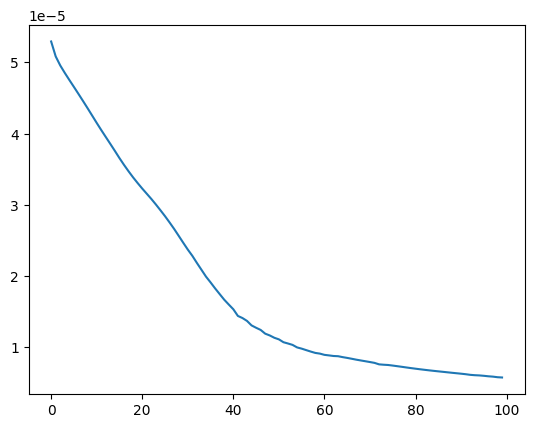

In [104]:
try:
    train_AE()
    PATH = "/content/gdrive/My Drive/MTL-RED/MODELS/ARRYTHMIA/MMD_AE/meta_latent_MMD_model_V1.pth"
    torch.save(multitaskAE.state_dict(), PATH)
    print("MODEL SAVED")
    print ("TRAIN LOSS:", train_losses)
    print("PLOTTING TRAINING:")
    X = np.arange(epochs)
    Y = train_losses
    plt.plot(X, Y)
    plt.savefig('loss_vs_epoch.png')

except KeyboardInterrupt:
    # save model
    PATH = "/content/gdrive/My Drive/MTL-RED/MODELS/ARRYTHMIA/MMD_AE/meta_latent_MMD_model_V1.pth"
    torch.save(multitaskAE.state_dict(), PATH)
    print("MODEL SAVED")
    print("PLOTTING TRAINING:")
    X = np.arange(epochs)
    Y = train_losses
    plt.plot(X, Y)
    plt.savefig('loss_vs_epoch.png')

In [105]:
from torch.utils.data import Dataset, DataLoader
class DataBuilder(Dataset):
    def __init__(self, X_test, y_test):
        #self.x, self.standardizer, self.wine = load_data(DATA_PATH)
        self.x, self.y = X_test, y_test
        self.len=self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [106]:
!pwd

/content/gdrive/My Drive/DATASETS/ARRYTHMIA


In [107]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

def test(X_test, y_test):
  data_set=DataBuilder(X_test, y_test)
  testloader=DataLoader(dataset=data_set,batch_size=1)
  correct = 0
  total = 0
  predict_lst = []
  labels_lst = []

  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      multitaskAE.eval()
      for data in testloader:
          X_test, labels = data
          X_test = X_test.float().to(device)
          labels = labels.long().to(device)
          # calculate outputs by running images through the network
          logits, recon_batch, Z = multitaskAE(X_test)
          #print ("logits:", logits)

          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(logits.data, 1)
          predict_lst.append(predicted.cpu().detach().numpy())
          #predicted = torch.argmax(logits)

          labels_lst.append(labels[0].cpu().detach().numpy())

          #print("out:", _)

          #print ("PREDICTED:", predicted)

          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the test images: {100 * correct / total} %')

  # prec = precision_score(labels_lst, predict_lst)
  # rec = recall_score(labels_lst, predict_lst)
  # f1 = f1_score(labels_lst, predict_lst)
  # roc_auc = roc_auc_score(labels_lst, predict_lst)
  # print(prec, rec, f1, roc_auc)

In [108]:
#test(np.concatenate((X_BOT_test[:10000], X_BENIGN_TEST_test[:10000])), np.concatenate((y_BOT_test[:10000], y_BENIGN_TEST_test[:10000])))

test(np.concatenate((X_BENIGN_TEST_test[:10000], X_BENIGN_TEST_test[:10000])), np.concatenate((y_BENIGN_TEST_test[:10000], y_BENIGN_TEST_test[:10000])))

Accuracy of the network on the test images: 63.63 %


In [109]:
# test(np.concatenate((X_RARE_test[:566], X_BENIGN_TEST_test[:566])), np.concatenate((y_RARE_test[:566], y_BENIGN_TEST_test[:566])))
test(np.concatenate((X_SVEB_test[:1000], X_SVEB_test[:1000])), np.concatenate((y_SVEB_test[:1000], y_SVEB_test[:1000])))

Accuracy of the network on the test images: 44.9 %


In [110]:
test(np.concatenate((X_VEB_test[:10000], X_VEB_test[:10000])), np.concatenate((y_VEB_test[:10000], y_VEB_test[:10000])))

Accuracy of the network on the test images: 98.58753031816237 %


In [111]:
test(np.concatenate((X_F_test[:10000], X_F_test[:10000])), np.concatenate((y_F_test[:10000], y_F_test[:10000])))

Accuracy of the network on the test images: 89.66376089663761 %


In [112]:
#test(np.concatenate((X_DDOS_SOLARIS_test[:10000], X_BENIGN_TEST_test[:10000])), np.concatenate((y_DDOS_SOLARIS_test[:10000], y_BENIGN_TEST_test[:10000])))
test(np.concatenate((X_Q_test[:10000], X_Q_test[:10000])), np.concatenate((y_Q_test[:10000], y_Q_test[:10000])))

Accuracy of the network on the test images: 93.33333333333333 %


In [113]:
test(np.concatenate((X_DDOS_HOIC_test[:10000], X_BENIGN_TEST_test[:10000])), np.concatenate((y_DDOS_HOIC_test[:10000], y_BENIGN_TEST_test[:10000])))

NameError: name 'X_DDOS_HOIC_test' is not defined

In [ ]:
test(np.concatenate((X_DDOS_GOLDEN_EYE_test[:10000], X_BENIGN_TEST_test[:10000])), np.concatenate((y_DDOS_GOLDEN_EYE_test[:10000], y_BENIGN_TEST_test[:10000])))